## San Francisco Crime Classification <Level 1> 과제

![sf crime](http://drive.google.com/uc?export=view&id=1WxNezzSSmypLqQfPd-bLajr09qvmjAHF)

### 머신러닝 알고리즘을 활용하여 샌프란시스코에서 발생한 범죄의 종류를 예측하기

(이 주피터 노트북은 다음의 링크 [https://bit.ly/dslive-0101](https://bit.ly/dslive-0101) 에서 다운받을 수 있습니다. 제출 안내는 파일의 마지막 부분에 안내되어 있습니다.


----
이번에 우리가 참여할 경진대회는 캐글의 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 입니다.

[SF OpenData](https://datasf.org/opendata/)에서는 샌프란시스코 도시에 대한 다양한 정보(부동산, 에너지, 교통, 헬스케어 등)를 공개하고 있습니다. 이 중에서, 우리는 2003년부터 2015년도까지 샌프란시스코에서 발생한 범죄 데이터를 확보합니다. 이 데이터를 활용해, 우리는 특정 위치와 특정 시간에 발생한 범죄의 구체적인 종류(ex: 절도, 살인, 뺑소니 등)를 맞추는 경진대회에 참여할 것입니다. 이번 경진대회에서 우리가 배우고자 하는 내용은 다음과 같습니다.

**1. 좌표와 주소 데이터를 다루는 법을 배울 수 있습니다.**

범죄를 예측하는데 가장 중요한 정보는 범죄가 발생한 위치입니다. 이번 경진대회에는 범죄가 일어난 구체적인 위치를 1) 좌표(위도, 경도)와 2) 주소(ex: 1100 Block of MARKET ST)로 표현합니다. 이러한 장소 데이터를 어떻게 분석하고 활용할 수 있는지를 배울 수 있습니다.

**2. 예측 모델의 성능을 평가할 때, 범죄마다의 중요도를 다르게 주는 법을 배울 수 있습니다.**

이번 경진대회에서는 구현한 예측 모델의 성능을 평가할 때 감안해야 점이 있습니다. 바로 범죄마다의 중요도가 다르다는 것인데요, 가령 같은 범죄라도 1) 절도를 한 번 못 맞추는 것과 2) 살인을 한 번 못 맞추는 것의 차이는 달라야 합니다. (=살인을 못 맞췄을 때 페널티를 더 줘야 합니다) 이번 경진대회에서는 예측 모델의 성능을 검증할 때 범죄마다의 페널티를 다르게 가져가는 방법을 배울 것입니다.

**3. 데이터의 신뢰도를 데이터 분석과 시각화를 통해 파악하는 법을 배울 수 있습니다.**

현실 세계의 데이터는 연구용 데이터와 다르게 굉장히 지저분하며, 신뢰할 수 없는 정보가 다소 포함되어 있습니다. 이번 경진대회에서는 데이터 시각화를 활용해 데이터의 신뢰도를 파악하는 법을 배울 것입니다. 시간과 좌표, 주소 데이터를 면밀하게 분석하고, 신뢰할 수 없는 데이터는 버리거나 신뢰도를 높일 수 있는 방법을 배울 것입니다.

**4. 대용량 데이터를 효율적으로 다루는 법을 배울 수 있습니다.**

이번 경진대회는 학습(train) 데이터만 총 878,049개로 굉장히 큽 니다. 이 정도 규모의 데이터는 보통 노트북(또는 데스크탑 컴퓨터)에서 다룰 수 없지만, 만일 대용량 데이터를 효율적으로 다루는 노하우를 배운다면 같은 데이터를 1/30의 사이즈로 압축하여 분석할 수 있습니다. 이번 경진대회에서는 이런 대용량 데이터를 효율적으로 압축하여 분석하는 노하우에 대해 배울 것입니다.

### 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/sf-crime/data)에서 다운받으실 수 있습니다)

* **Dates** - 범죄가 발생한 날짜와 시간을 나타냅니다.
* **Category** - 범죄의 세부적인 종류(ex: 절도, 살인, 뺑소니 등)를 나타냅니다. 이 데이터는 train.csv 에만 존재하며, 이 데이터를 우리의 레이블(Label), 즉 우리가 맞춰야 할 정답으로 간주합니다.
* **Descript** - 범죄의 세부 정보입니다. train.csv 에만 존재하는 데이터이지만 아마도 사용하지 않을 것입니다.
* **DayOfWeek** - 범죄가 발생한 요일(월 ~ 일) 정보 입니다.
* **PdDistrict** - 범죄를 관할하는 경찰서의 이름입니다.
* **Resolution** - 범죄의 상태, 범죄가 해결되었는지 여부를 나타냅니다. train.csv 에만 존재하는 데이터이며 아마도 사용하지 않을 것입니다.
* **Address** - 범죄가 발생한 구체적인 주소입니다.
* **X** - 범죄가 발생한 좌표 정보, 그 중에서도 경도(Longitude)를 나타냅니다.
* **Y** - 범죄가 발생한 좌표 정보, 그 중에서도 위도(Latitude)를 나타냅니다.


## Load Dataset

모든 데이터 분석의 시작은 주어진 데이터를 읽어오는 것입니다. [판다스(Pandas)](https://pandas.pydata.org/)에서는 [CSV](https://ko.wikipedia.org/wiki/CSV_(%ED%8C%8C%EC%9D%BC_%ED%98%95%EC%8B%9D)) 데이터를 읽을 때 보통 [read_csv](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)라는 기능을 사용해서 읽어옵니다.

먼저 ```read_csv```를 활용해 San Francisco Crime Classification 경진대회에서 제공하는 두 개의 데이터(train, test)를 읽어오겠습니다. ([다운로드 링크](https://www.kaggle.com/c/sf-crime/data))

여기서 파일의 경로를 지정하는 방법에 주의하셔야 합니다. 파일 경로 지정은 컴퓨터의 설정마다 천차만별로 다르기 때문에 사전에 컴퓨터의 경로 지정 개념을 숙지해두셔야 합니다. 만일 read_csv를 실행할 때 ```FileNotFoundError```라는 이름의 에러가 난다면 경로가 제대로 지정이 되지 않은 것입니다. 만일 **파일의 경로를 지정하는 법이 생각나지 않는다면 [다음의 링크](http://88240.tistory.com/122)를 통해 경로를 지정하는 법을 복습한 뒤 다시 시도해주세요.**

In [1]:
import pandas as pd
import numpy as np

In [2]:
train = pd.read_csv("SF_Crime/train.csv")

print(train.shape)
train.head(2)

(878049, 9)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


## 1주차 과제: 탐험적 데이터 분석

훌륭한 데이터 사이언티스트와 그렇지 않은 데이터 사이언티스트의 차이점 중 하나는 데이터를 분석하는 능력, 일명 탐험적 데이터 분석([Exploratory Data Analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis), 이하 EDA) 입니다. 훌륭한 데이터 사이언티스트는 새로운 캐글 경진대회에 참여하거나, 업무상으로 데이터를 처음 받아서 분석할 때, 적어도 이틀에서 길면 일주일까지는 머신러닝 모델을 만들지 않고 끈기있게 데이터를 분석합니다.

왜 머신러닝 모델을 처음에 만들지 않을까요? 보통 우리가 머신러닝 모델을 만들때는 [Cross Validation](https://en.wikipedia.org/wiki/Cross-validation_(statistics))을 활용해 머신러닝 모델의 성능을 측정하고, 여기에서 점수로 피드백을 받아 모델을 개선해나갑니다. 이 방식은 초반에는 어렵지만, 훨씬 직관적이며 try and error 방식으로 모델을 점진적으로 개선해 나갈 수 있습니다.

하지만 이 방식에는 단점이 있는데, 모델이 개선되었을 때(=점수가 좋아졌을 때) 왜 개선되었는지, 개선되지 않았을 때(=점수가 좋아지지 않았을 때) 왜 개선되지 않았는지를 명확히 알기 어렵다는 것입니다. 이를 알 수 없으면, 우리는 아무런 의미 없이 반복적으로 Cross Validation를 실행하기만 할 뿐, 모델을 개선할 구체적인 전략을 짜는게 어려워집니다.

![cross validation](http://drive.google.com/uc?export=view&id=1pLWYdVHkUmQobVgxhbIDQPrYXvC4bBEF)

<small><center><b>이렇게 Cross Validation을 통해 모델의 성능을 정량적으로 측정한 뒤(=점수로 확인한 뒤) 모델을 개선할 수도 있지만,</b></center></small>
<small><center><b>이 경우에는 이 점수가 좋아졌을 때 왜 좋아졌고, 점수가 안 좋아졌을 때 왜 안 좋아졌는지를 명확하게 파악하기 어렵습니다.</b></center></small>

그래서 훌륭한 데이터사이언티스트는 데이터를 처음 받았을 때 적어도 이틀, 길면 일주일까지 이틀에서 길면 일주일까지 Cross Validation를 하지 않고 1) 엑셀 분석과 2) 데이터 시각화를 통해 데이터를 완벽히 이해할려고 노력합니다. 언제까지 분석해야 할까요? 우리가 이 데이터를 완벽하게 이해했다고 확신하기 전 까지 데이터를 분석해야 하며, 그 전에는 절대로 모델을 만들고 Cross Validation으로 모델을 개선해나가는 것을 권장하지 않습니다.


그러므로 이번 주 수강생에게 제공해드리는 과제는 바로 탐험적 데이터 분석(EDA)입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 발생한 데이터를 분석해서, 머신러닝 모델을 개선하고 발전시킬 수 있는 힌트를 찾아주세요.

주어지는 기간은 **과제를 받은 뒤 일주일**입니다. 일주일간 시간을 들여 천천히 데이터를 분석한 뒤, 분석한 결과(쥬피터 노트북, .ipynb 파일)를 datascience@dsschool.co.kr 로 제출해주세요. 쥬피터 노트북 파일은 좌상단의 File -> Download as -> Notebook(.ipynb)를 클릭하면 다운받을 수 있습니다.

탐험적 데이터를 할 때 사용하는 파이썬 패키지는은 자유롭게 선택할 수 있지만, 일단 데이터 시각화에서는 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)만을 사용한다고 간주하겠습니다. ([ggplot](http://ggplot.yhathq.com/)이나 [bokeh](https://bokeh.pydata.org/en/latest/)등을 사용하셔도 무방합니다)

### Configuration

먼저 EDA를 하기 위해 필요한 몇몇 파이썬 패키지를 읽어오겠습니다.

In [3]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

## Dates

가장 분석하고 싶은 컬럼은 날짜와 시간을 나타내는 ```Dates``` 컬럼입니다. ```Dates``` 컬럼에서는 범죄가 어느 날짜/시간에 발생했는지 연월일시분초로 표현되어습니다. 이 컬럼을 활용해서, 범죄가 특정 연도, 월, 일, 시간, 분, 초에 많이 발생하는지 적게 발생하는지를 seaborn의 [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)으로 먼저 살펴보겠습니다.

In [4]:
train["Dates"] = pd.to_datetime(train["Dates"])

train["Dates-year"] = train["Dates"].dt.year
train["Dates-month"] = train["Dates"].dt.month
train["Dates-day"] = train["Dates"].dt.day
train["Dates-hour"] = train["Dates"].dt.hour
train["Dates-minute"] = train["Dates"].dt.minute
train["Dates-second"] = train["Dates"].dt.second

print(train.shape)
train[["Dates", "Dates-year", "Dates-month", "Dates-day", "Dates-hour", "Dates-minute", "Dates-second"]].head()

(878049, 15)


,Dates,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
0,2015-05-13 23:53:00,2015,5,13,23,53,0
1,2015-05-13 23:53:00,2015,5,13,23,53,0
2,2015-05-13 23:33:00,2015,5,13,23,33,0
3,2015-05-13 23:30:00,2015,5,13,23,30,0
4,2015-05-13 23:30:00,2015,5,13,23,30,0


이제 ```Dates``` 컬럼을 시각화 해보겠습니다.

시각화를 하기 전에 EDA를 하는 좋은 팁을 하나 알려드리자면, 저는 **시각화를 하기 전에 이 시각화 결과가 어떤 그림을 나올지 머릿속으로 먼저 상상하는 것을 추천합니다.** 먼저 상상한 뒤 실제 결과와 비교하면 우리가 가지고 있던 상상과 실제 데이터의 차이를 명확하게 파악할 수 있습니다.

가령 저라면 연, 월, 일, 시, 분, 초 별 범죄의 발생 빈도를 이렇게 상상할 것 같습니다.

### Q1-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. 일단 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같습니다. 가령 범죄자가 현재 시간이 37분이면 범죄를 저지르고, 43분이면 범죄를 저지르지 않는 이상한 행동을 할 필이 없습니다. 그러므로 countplot으로 시각화를 해보면, 마치 [Uniform Distribution](https://m.blog.naver.com/PostView.nhn?blogId=running_p&logNo=90179231685&proxyReferer=https%3A%2F%2Fwww.google.co.kr%2F)과 은 모양이 나올 것 같습니다.
1. 그리고 일(```Dates-day```)도 마찬가지입니다. 하지만 일(```Dates-day```)은 다른 데이터와 다르게 31일만 한정해서 범죄가 적게 발생할 것 같습니다. 왜냐하면 31일은 다른 날과는 다르게 1년에 절반(1, 3, 5, 7, 8, 10, 12월)밖에 발생하지 않기 때문입니다.
1. 반면 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같습니다. 가령 새벽에는 범죄가 덜 발생할 것이고, 오후 시간에는 범죄가 많이 발생할 것입니다.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

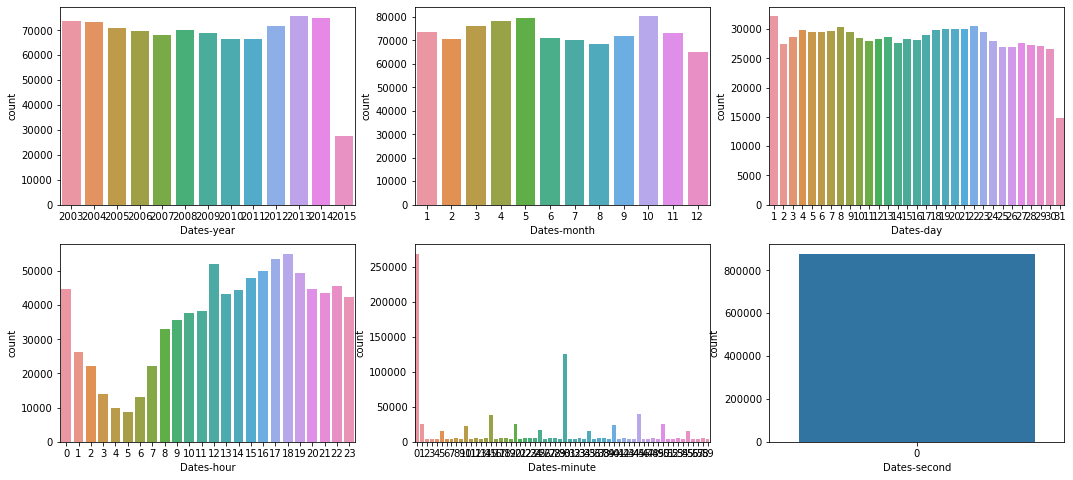

In [5]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

figure.set_size_inches(18, 8)

sns.countplot(data=train, x="Dates-year", ax=ax1)
sns.countplot(data=train, x="Dates-month", ax=ax2)
sns.countplot(data=train, x="Dates-day", ax=ax3)
sns.countplot(data=train, x="Dates-hour", ax=ax4)
sns.countplot(data=train, x="Dates-minute", ax=ax5)
sns.countplot(data=train, x="Dates-second", ax=ax6)

몇몇 부분은 우리의 예상과 일치하지만, 몇몇 부분은 차이가 있는 것 같습니다. 하나하나 살펴보겠습니다.

### Q1-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 분(```Dates-minute```), 초(```Dates-second```)는 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

초(```Dates-second```)는 우리의 예상과 일치하네요. 데이터가 전부 0으로 기록되어 있습니다. 그 뜻은, 초(```Dates-second```) feature로 넣어도 큰 의미가 없다고 해석할 수 있습니다.

하지만 분(```Dates-minute```)은 다릅니다. 범죄의 발생 빈도에 차이가 있고, 특이하게도 0분과 30분에 범죄가 빈번하게 발생합니다. 그 다음으로 순서대로 15분과 45분, 5분 10분 15분 20분 25분 등등으로 발생합니다. 이는 우리의 예상과 확연하게 다른 것 같습니다.

**2. 일(```Dates-day```) 31일을 제외하면 범죄의 발생 빈도를 판가름하는데 별 영향이 없을 것 같다.**

이는 시각화 결과와 일치합니다. 31일은 확실히 다른 날에 비해서 범죄가 절반 정도밖에 발생하지 않는 것 같습니다. 하지만 여기서도 특이한 사실을 알 수 있는데, 1일의 범죄 발생 빈도가 다른 날에 비해서 비약적으로 높습니다. 이는 우리의 예상과 다릅니다. 가령 어떤 범죄자, 내지는 어떤 범죄에 한정해서 1일에만 범죄가 빈번하게 발생한다? 라는 아이디어도 생각해 볼 수 있겠죠. (하지만 다소 납득하기 어려운 건 사실입니다)

**3. 시간(```Dates-hour```)은 범죄 발생 빈도에 큰 영향이 있을 것 같다.**

이는 시각화 결과와 일치합니다. 확실히 새벽에 범죄가 덜 발생하는 것 같고, 오후와 저녁에 범죄가 많이 발생하는 것 같습니다. 하지만 여기서도 신기한 사실은, 특이하게 0시와 12시에 범죄가 발생하는 빈도가 높은 것 같습니다. 이 점도 특이하다고 볼 수 있으며, 우리가 눈여겨봐야 하는 부분입니다.

자, 이제 더 중요한 사실에 대해서 고민해 보도록 하겠습니다. 우리에게 중요한건 데이터에 어떤 특징이 있는지 발견하는 것도 있지만, **이 특징을 활용해 앞으로 사용할 머신러닝 알고리즘을 개선시킬 수 있는가?**가 더 중요합니다. 또한 개선을 한다면 구체적으로 어떤 방식으로 개선하는지도 중요하겠죠.

C:\Users\YC\Anaconda3\lib\site-packages\seaborn\distributions.py:340: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(0, auto=None)


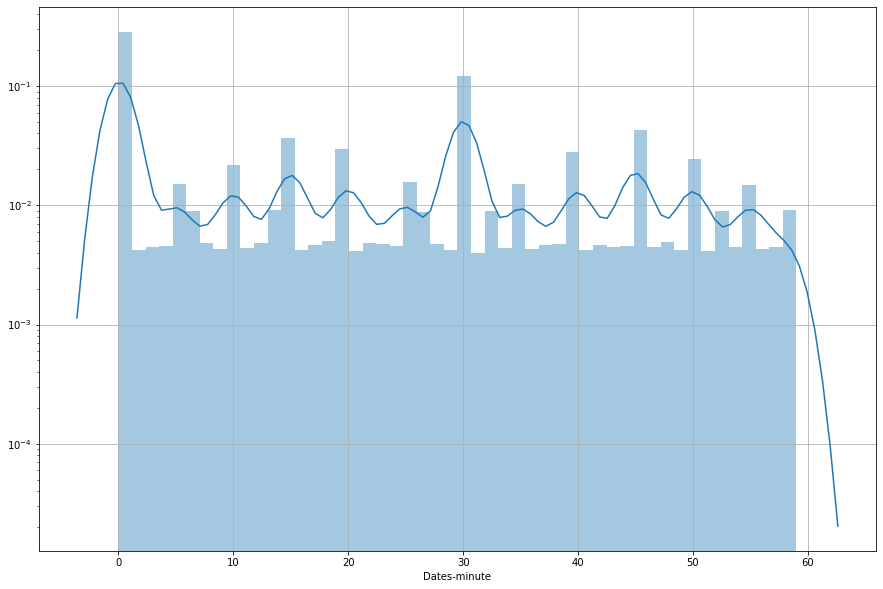

In [6]:
plt.figure(figsize=(15,10))
plt.grid()
sns.distplot(train['Dates-minute'], hist_kws={'log':True})

In [7]:
pd.pivot_table(train, index='Dates-day', columns='Dates-minute', aggfunc='size')[[0,5,10,15,20,25,30,35,40,45,50,55]].describe()

Dates-minute,0,5,10,15,20,25,30,35,40,45,50,55
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.00000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,8675.806452,508.516129,734.258065,1222.709677,839.580645,521.870968,4037.83871,501.709677,795.741935,1297.709677,822.419355,496.967742
std,919.565456,61.769394,82.984323,133.227923,104.054401,56.011155,392.89236,53.419842,83.697458,142.627298,96.982395,56.441406
min,4688.000000,266.000000,353.000000,578.000000,401.000000,286.000000,2171.00000,265.000000,434.000000,673.000000,405.000000,244.000000
25%,8427.500000,496.500000,715.000000,1198.000000,795.000000,500.500000,3929.50000,484.000000,759.500000,1252.000000,796.000000,489.500000
50%,8789.000000,522.000000,754.000000,1244.000000,858.000000,524.000000,4096.00000,512.000000,798.000000,1309.000000,836.000000,511.000000
75%,8985.000000,543.000000,774.000000,1284.000000,914.000000,568.000000,4249.50000,524.500000,848.500000,1392.500000,855.500000,528.500000
max,11169.000000,586.000000,865.000000,1361.000000,971.000000,583.000000,4443.00000,580.000000,903.000000,1451.000000,945.000000,558.000000


### Q1-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.


1. 일단 초(```Dates-second```)는 전부 다 0으로 기록되어 있기 때문에, 범죄를 예측하는데 크게 중요하지 않을 것 같습니다. 그러므로 feature에서 제거하는 것도 좋은 아이디어 같습니다.
2. 다른 컬럼들, 특히나 시간(```Dates-hour```) 데이터는 예측 모델이 범죄를 예측하는데 큰 영향을 미칠 것 같습니다.
3. **분(```Dates-minute```)은 주로 5분 간격으로 집중되어 분포되어 있음을 볼 수 있는데 시간데이터가 저장되는 로직상(?)의 문제로 범죄를 예측하는데 중요하지 않은 요인으로 판단됨.(distplot을 보면 데이터 분포가 5분단위로 규칙적인 것처럼 나타남. 예를 들면, 1시 58분에 범죄가 발생했는데 편의상 2시로 어림잡아 기록했을 것이라 예상됨. 데이터에서 시간이 누가 어떻게 기록되는지를 몰라 정확한 근거가 부족함.)**

## X, Y

그 다음 분석하고 싶은 컬럼은 좌표 데이터입니다. [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회는 크게 두 가지 좌표 데이터가 있는데, 위도(Latitude)와 경도(Longitude)입니다. 데이터에서는 ```Y``` 컬럼이 위도를, ```X``` 컬럼이 경도를 나타냅니다. 이 정보는 범죄가 구체적으로 어떤 위치에서 발생했는지를 좌표로 찍어준거라고 볼 수 있습니다.

이런 좌표 정보를 시각화를 통해서 분석할 수 있는 가장 일반적인 방법은 seaborn의 [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)입니다. 이 기능을 활용해서 좌표 정보를 시각화해보겠습니다.

먼저 시각화하기 전에, 이 시각화가 어떤 그림이 나올지 상상해보겠습니다.

### Q2-1) 시각화를 하기 전에 어떤 그림이 나올 것으로 예상하시나요? 최소 3가지 아이디어를 생각해보세요.

**주의**: 이 내용은 반드시 **시각화를 하기 전에 작성하셔야 합니다.** 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  1. 일단 샌프란시스코의 좌표 데이터이기 때문에, 샌프란시스코의 지도와 유사한 그림이 나올 것으로 생각합니다.
  2. 하지만 현실세계의 데이터이기 때문에, 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같습니다.
  3. 그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.

자, 그럼 위 예상과 일치하는지 데이터 시각화를 통해 살펴보도록 하겠습니다.

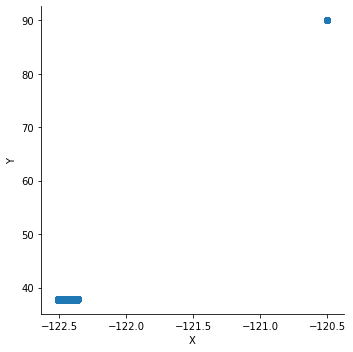

In [8]:
sns.lmplot(data=train, x="X", y="Y", fit_reg=False)

결과를 보면 재미있는 현상을 발견할 수 있습니다.

기대했던 샌프란시스코 지도는 온데간데 없고, 좌표가 좌하단과 우상단에 몰려있는 현상을 발견할 수 있죠. 이는 우리가 기대한 결과와 다릅니다. 제 추측으로는, 시각화 결과의 좌하단에 위치한 점이나 우상단에 위치한 점, 둘 중 하나는 아웃라이어(outlier)인것 같습니다.

굳이 찍어보자면 둘 중 어느 부분이 아웃라이어일까요? 좌하단은 점이 약간 분산되어 있는 반면에, 우상단은 한 점으로 확실하게 몰려있는 것이 보입니다. 그러므로 저는 우상단이 아웃라이어라고 간주하고 이를 찾아보겠습니다.

In [9]:
print('좌표 최대값 :',train["X"].max(), train["Y"].max())
X_outliers = (train["X"] == train["X"].max())
Y_outliers = (train["Y"] == train["Y"].max())
outlier = train[X_outliers & Y_outliers]

print(outlier.shape)
outlier

좌표 최대값 : -120.5 90.0
(67, 15)


,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y,Dates-year,Dates-month,Dates-day,Dates-hour,Dates-minute,Dates-second
660485,2005-12-30 17:00:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Friday,TENDERLOIN,NONE,5THSTNORTH ST / OFARRELL ST,-120.5,90.0,2005,12,30,17,0,0
660711,2005-12-30 00:34:00,ASSAULT,INFLICT INJURY ON COHABITEE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
660712,2005-12-30 00:34:00,ASSAULT,AGGRAVATED ASSAULT WITH BODILY FORCE,Friday,BAYVIEW,"ARREST, BOOKED",JAMESLICKFREEWAY HY / SILVER AV,-120.5,90.0,2005,12,30,0,34,0
661106,2005-12-29 00:07:00,NON-CRIMINAL,"AIDED CASE, MENTAL DISTURBED",Thursday,TENDERLOIN,PSYCHOPATHIC CASE,5THSTNORTH ST / EDDY ST,-120.5,90.0,2005,12,29,0,7,0
666430,2005-11-30 11:25:00,OTHER OFFENSES,TRAFFIC VIOLATION,Wednesday,TENDERLOIN,"ARREST, CITED",5THSTNORTH ST / ELLIS ST,-120.5,90.0,2005,11,30,11,25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844995,2003-06-11 08:49:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Wednesday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,11,8,49,0
845842,2003-06-09 09:25:00,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Monday,INGLESIDE,"ARREST, CITED",JAMES LICK FREEWAY HY / CESAR CHAVEZ ST,-120.5,90.0,2003,6,9,9,25,0
852880,2003-05-02 01:00:00,SEX OFFENSES FORCIBLE,"FORCIBLE RAPE, BODILY FORCE",Friday,SOUTHERN,COMPLAINANT REFUSES TO PROSECUTE,3RD ST / JAMES LICK FREEWAY HY,-120.5,90.0,2003,5,2,1,0,0
857248,2003-04-14 16:30:00,ROBBERY,"ROBBERY ON THE STREET, STRONGARM",Monday,BAYVIEW,COMPLAINANT REFUSES TO PROSECUTE,GILMAN AV / FITCH ST,-120.5,90.0,2003,4,14,16,30,0


확인 결과 총 67개의 아웃라이어를 발견했습니다.

67개라는 건 전체 데이터(878049)의 0.01%도 되지 않기 때문에, 이 아웃라이어를 개선하거나 해결한다고 머신러닝 알고리즘의 성능을 크게 끌어올리는 건 어려울 것 같습니다. 그러므로 이 부분은 저도 후순위로 미루겠습니다. (나중에 시간이 될 때 여러분들이 스스로 분석해보세요)

이번에는 아웃라이어를 제거한 좌표 데이터로 시각화를 해보겠습니다.

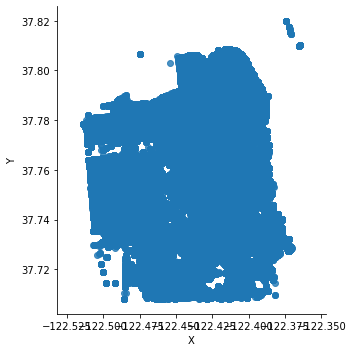

In [10]:
non_outliers = train[~(X_outliers & Y_outliers)]

sns.lmplot(data=non_outliers, x="X", y="Y", fit_reg=False)

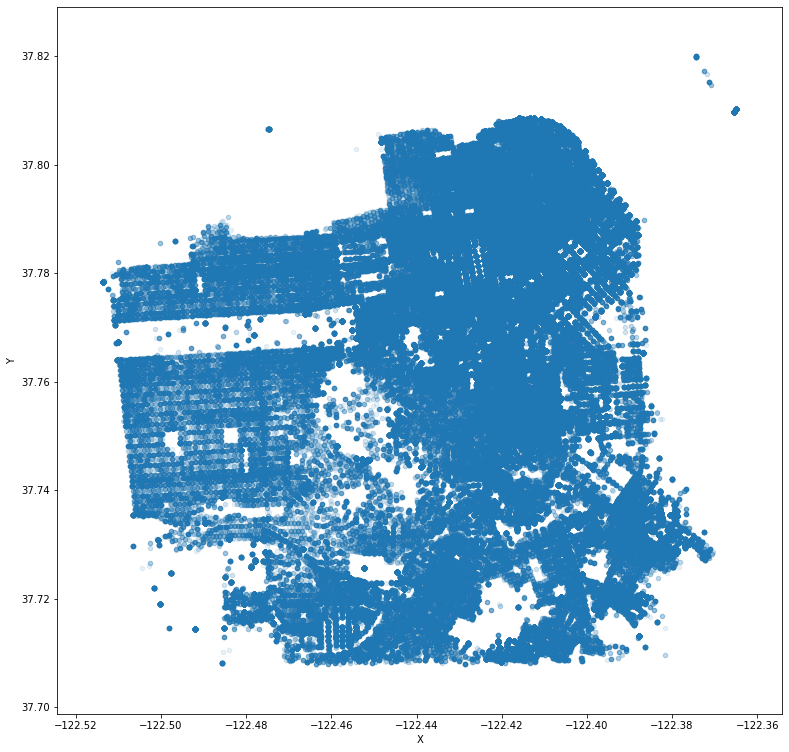

In [11]:
non_outliers.plot(kind='scatter', x='X', y='Y', alpha=0.1, figsize=(13,13))

In [12]:
import folium

def generateBaseMap(default_location=[37.759579, -122.441723], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()
base_map

**=> lmplot에서 나타난 공백부분은 산, 공원, 호수로 구성되 있으며 주로 주거지역에서 범죄가 발생하고 있음**

이제 원하는 그림(샌프란시스코 지도)이 나온 것을 확인할 수 있습니다.

### Q2-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 샌프란시스코의 지도와 유사한 그림이 나올 것 같다.**

일단 아웃라이어(-120.5, 90)가 전체 분포와 너무 멀리 떨어져 있기 때문에, 좌표 데이터가 좌하단이나 우상단으로 쏠리는 문제가 있었습니다. 하지만 이 아웃라이어를 제거한 후 출력한 시각화는 예상대로 샌프란시스코 지도와 유사한 그림이 나오는 것을 확인할 수 있습니다.

**2. 샌프란시스코 지도 외각으로 데이터의 분포와 동떨어진 아웃라이어(outlier)가 존재할 것 같다.**

우리의 예상과 일치합니다. 다만 그 아웃라이어가 샌프란시스코 지역과 우상단쪽으로 크게 동떨어진 것이 특이한 점 같습니다.

**3.그리고 범죄의 종류(ex: 절도, 살인 등)와 관계 없이 범죄 자체가 아에 발생할 가능성이 낮은 지역에는 그림에서 공백으로 보일 것 같습니다.**

시각화 결과를 살펴보면 확실히 지도 내부에 공백이 있는 부분이 보이는 것 같습니다. 이런 면에서 우리의 예상이 일치하는 것 같아 보이기도 합니다. 다만 이는 범죄가 발생하지 않는 지역인지, 애초부터 범죄가 발생할 수 없는 지역(산, 호수, 공원 등)인지를 명확히 알아봐야 합니다. 이는 여러분들에게 맡기겠습니다.

### Q2-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.

1. 일단 아웃라이어가 전체 데이터의 0.01%도 되지 않기 때문에, 이 아웃라이어를 해결한다고 모델의 성능이 크게 좋아지지는 않을 것입니다.
2. 아직 범죄 종류(ex: 절도, 살인 등)마다의 좌표 데이터의 변화를 보지 못했지만, 만일 범죄 종류마다 좌표 데이터가 차이가 있다면(=특정 지역에서 많이 발생하는 범죄 등이 있다면) 이 데이터를 머신러닝 모델에 집어 넣으면 성능을 좋게 만들 수 있을 것 같습니다.
3. **또한 요일별 범죄 발생을 추가해 모델의 성능을 개선 할 수 있을 것 같음(가령, 주말에는 유동인구가 많은 downtown쪽에 범죄가 많이 발생하는지)**

## DayOfWeek

이번에 분석할 데이터는 요일(```DayOfWeek```) 컬럼입니다. 여기서부터는 제가 직접 하지 않고, 여러분들을 위한 과제로 제공하겠습니다. 앞서 ```Dates``` 컬럼과 ```X```, ```Y``` 컬럼을 EDA 했던 것 처럼, DayOfWeek도 직접 EDA 해보세요.

**힌트**

  * 시각화에서 큰 차이를 볼 수 없다면, Category(범죄 종류) 컬럼을 섞어서 시각화하면 좋은 힌트가 나올 수도 있습니다.

### Q3-1) DayOfWeek 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

  **1. 범죄가 많이 발생하는 특정 요일이 존재할 것으로 예상됨.**
  
  **2. DayOfWeek마다 자주 발생하는 범죄 유형이 각각 다를 것으로 예상됨.**
  
  **3. 또한, 지역마다 자주 발생하는 범죄가 다를 것으로 예상됨.**


### DayOfWeek 컬럼 시각화하기

In [13]:
new_data = non_outliers.copy()

new_data['Dates'] = pd.to_datetime(new_data['Dates'])
new_data['Dates-year'] = new_data['Dates'].dt.year
new_data['Dates-month'] = new_data['Dates'].dt.month
new_data['Dates-day'] = new_data['Dates'].dt.day
new_data['Dates-hour'] = new_data['Dates'].dt.hour
new_data['Dates-weekday'] = new_data['Dates'].dt.weekday_name

Friday       133723
Wednesday    129200
Saturday     126804
Thursday     125027
Tuesday      124954
Monday       121573
Sunday       116701
Name: Dates-weekday, dtype: int64


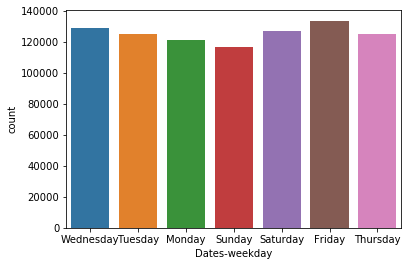

In [14]:
print(new_data['Dates-weekday'].value_counts())
sns.countplot(data=new_data, x='Dates-weekday')

In [15]:
new_data['Dates-weekday'] = new_data['Dates'].dt.weekday
pivot = pd.pivot_table(new_data, index='Dates-weekday', columns='Category', aggfunc='size')
pivot.rename(index = {
    0 : 'Monday',
    1 : 'Tuesday',
    2 : 'Wednesday',
    3 : 'Thursday',
    4 : 'Friday',
    5 : 'Saturday',
    6 : 'Sunday'
}, inplace=True)
pivot.head(3)

Category,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,EMBEZZLEMENT,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
Dates-weekday,,,,,,,,,,,,,,,,,,,,,
Monday,228.0,10559.0,66.0,41.0,5262.0,608.0,263.0,7823.0,513.0,222.0,...,23.0,636.0,75.0,4447.0,1.0,1080.0,5945.0,7412.0,5811.0,1183.0
Tuesday,235.0,10280.0,76.0,37.0,5374.0,657.0,251.0,8474.0,461.0,156.0,...,23.0,713.0,66.0,4516.0,1.0,1114.0,5852.0,7261.0,6425.0,1176.0
Wednesday,200.0,10553.0,71.0,40.0,5457.0,659.0,221.0,9267.0,542.0,167.0,...,22.0,700.0,66.0,4851.0,NaN,1122.0,5927.0,7412.0,7028.0,1252.0


In [16]:
pivot_t = pivot.T
column_list = pivot_t.columns.tolist()
column_list2 = pivot.columns.tolist()
pivot_t.sort_values(by=column_list, ascending=False).head(10)

Dates-weekday,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Category,,,,,,,
LARCENY/THEFT,23568.0,23955.0,24484.0,24415.0,27102.0,27214.0,24147.0
OTHER OFFENSES,17783.0,18806.0,19946.0,18459.0,18587.0,17128.0,15456.0
NON-CRIMINAL,12854.0,12738.0,12928.0,12818.0,13983.0,14007.0,12972.0
ASSAULT,10559.0,10280.0,10553.0,10246.0,11157.0,11995.0,12082.0
DRUG/NARCOTIC,7823.0,8474.0,9267.0,8454.0,7420.0,6390.0,6143.0
VEHICLE THEFT,7412.0,7261.0,7412.0,7454.0,8612.0,8117.0,7504.0
VANDALISM,5945.0,5852.0,5927.0,5980.0,7092.0,7326.0,6602.0
WARRANTS,5811.0,6425.0,7028.0,6372.0,5926.0,5364.0,5280.0
BURGLARY,5262.0,5374.0,5457.0,5350.0,6326.0,4754.0,4231.0


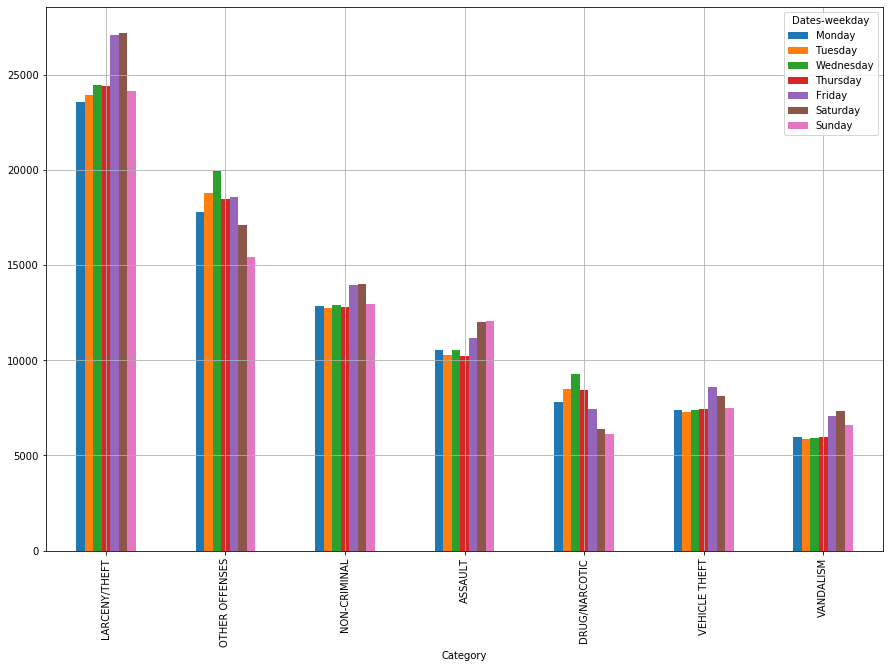

In [17]:
var = pivot_t.sort_values(by=column_list, ascending=False).head(7)
var.plot(kind='bar', figsize=(15,10), grid=True)

In [18]:
crime1 = new_data['Category'] == 'LARCENY/THEFT'
crime2 = new_data['Category'] == 'OTHER OFFENSES'
crime3 = new_data['Category'] == 'NON-CRIMINAL'
crime4 = new_data['Category'] == 'ASSAULT'
crime5 = new_data['Category'] == 'DRUG/NARCOTIC'
crime6 = new_data['Category'] == 'VEHICLE THEFT'
crime7 = new_data['Category'] == 'VANDALISM'

crime_clf = new_data[crime1|crime2|crime3|crime4|crime5|crime6|crime7]
print(crime_clf['Category'].value_counts())
print(crime_clf.shape)

LARCENY/THEFT     174885
OTHER OFFENSES    126165
NON-CRIMINAL       92300
ASSAULT            76872
DRUG/NARCOTIC      53971
VEHICLE THEFT      53772
VANDALISM          44724
Name: Category, dtype: int64
(622689, 16)


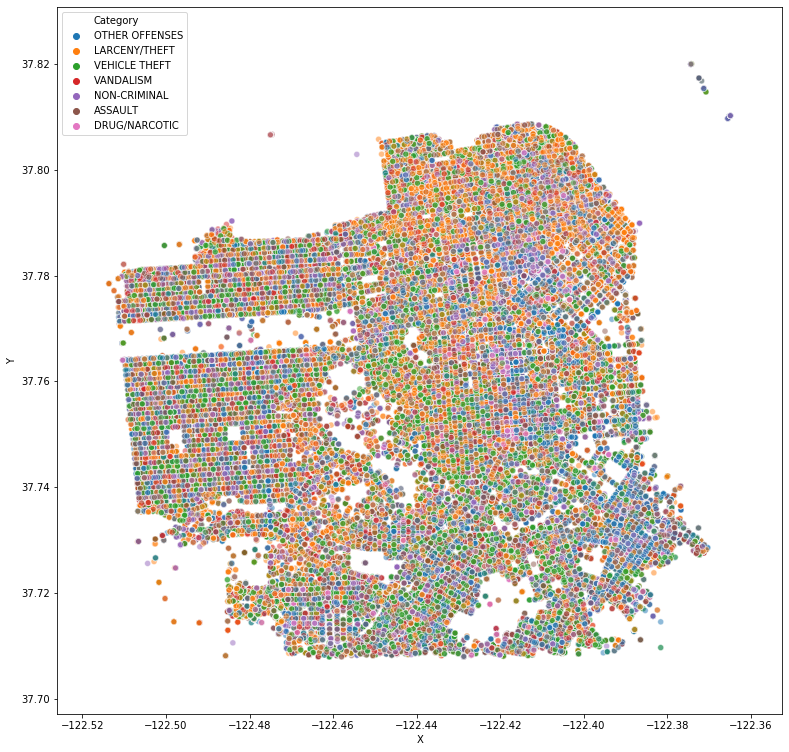

In [19]:
plt.figure(figsize=(13,13))
sns.scatterplot(data=crime_clf, x='X', y='Y', alpha=0.5, hue='Category')

### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?

**1. 범죄가 많이 발생하는 특정 요일이 존재할 것으로 보인다** 

누적 범죄 빈도를 보면 요일별 편차가 크지는 않지만 금요일에 범죄가 가장 많이 발생하고 일요일에 가장 적게 발생하는 것을 확인할 수 있었음. 

**2. DayOfWeek마다 자주 발생하는 범죄 유형이 각각 다를 것으로 보인다**

요일마다 자주 발생하는 범죄의 유형이 조금은 다른 것을 확인했음. 특히, ```LARCENY/THEFT```는 주말(토,일)에 비교적 높은 빈도를 보이며, ```OTHER OFFENSES```는 유독 수요일에 비교적 높은 빈도를 보였음.

**3. 지역마다 자주 발생하는 범죄가 다를 것이다**

예상한 것처럼 지역마다 확연하게 범죄 유형이 구분되지는 않았지만 ```LARCENY/THEFT```는 주로 북동쪽에서 많이 나타나는 것으로 보임.

### Q3-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.¶

1. **지역마다 범죄 유형이 확연하게 차이가 나지 않았지만 일부 지역(예시, downtown)을 확대해서 시각화해본다면 모델의 성능을 개선시킬 수 있을 것이라 생각됨**
2. **추가적으로 요일별 지역에 범죄 유형을 살펴본다면(특히, 주말에 높은 빈도를 나타낸 LARCENY/THEFT) 요일마다 차이가 있을 것이라 생각됨**
3. **특정 범죄 유형 하나를 정해 지역별로 시각화 해본다면 어느 도로, 구역에서 범죄가 발생하는 지를 확인할 수 있을 것임**

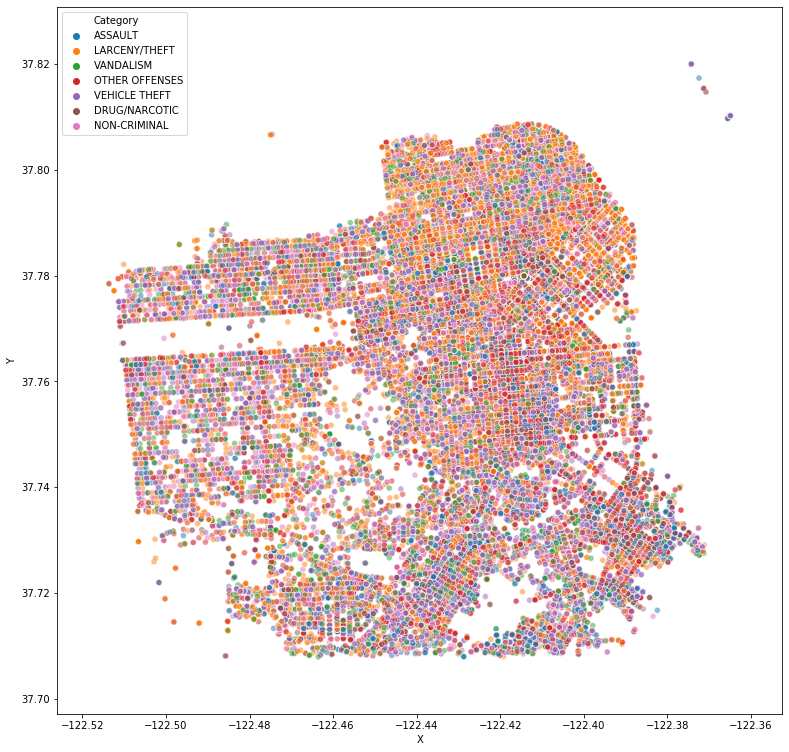

In [20]:
# 예시) 월요일에 발생하는 지역별 범죄 유형 맵 
mon = crime_clf[crime_clf['Dates-weekday'] == 0]
plt.figure(figsize=(13,13))
sns.scatterplot(data=mon, x='X', y='Y', alpha=0.5, hue='Category')

## PdDistrict
이번에 분석할 데이터는 관할 경찰서(PdDistrict) 컬럼입니다. 이 컬럼도 제가 직접 하지 않고 여러분들에게 과제로 제공하겠습니다. 앞서 Dates 컬럼과 X, Y 컬럼을 EDA 했던 것 처럼, PdDistrict도 직접 EDA 해보세요.

### Q4-1) PdDistrict 컬럼을 시각화 하기 전에 어떤 그림이 나올 것으로 예상하시나요?

**주의**: 이 내용은 반드시 시각화를 하기 전에 작성하셔야 합니다. 그래야 시각화 결과와 본인의 아이디어를 비교해서 차이를 발견할 수 있습니다.

1. **지도로 담당 ```PdDistrict```가 확연하게 구분되어 있을 것으로 예상됨**
2. **특정 범죄 발생 빈도가 높은 ```PdDistrict```가 존재할 것으로 예상됨**
3. **```PdDistrict```별로 범죄 발생 빈도에 차이가 있을 것으로 예상됨**

### PdDistrict 컬럼 시각화하기

```PdDistrict``` 시각화

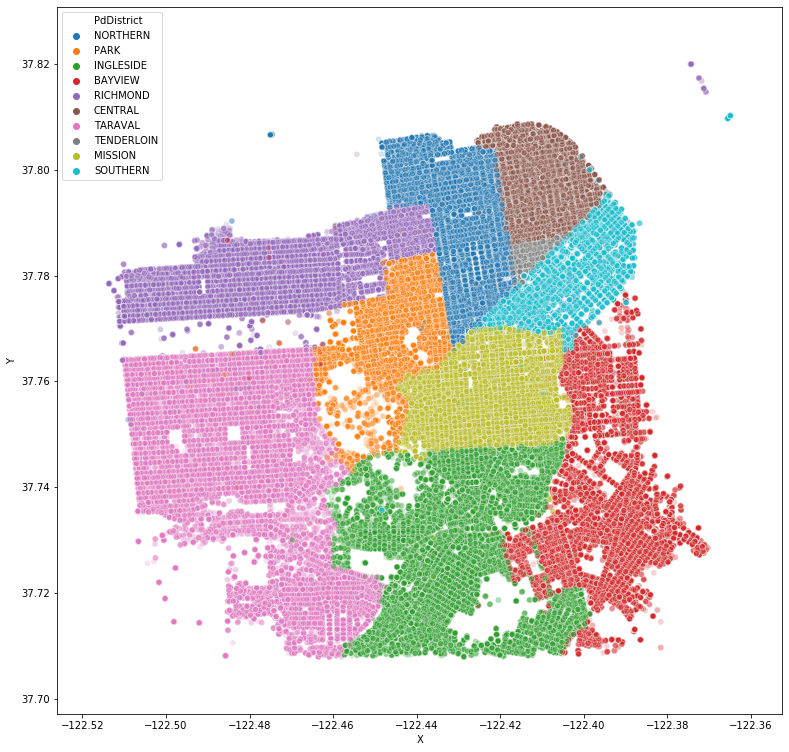

In [78]:
plt.figure(figsize=(13,13))
sns.scatterplot(data=crime_clf, x='X', y='Y', alpha=0.2, hue='PdDistrict')

```PdDistrict```별 범죄유형 발생 빈도 

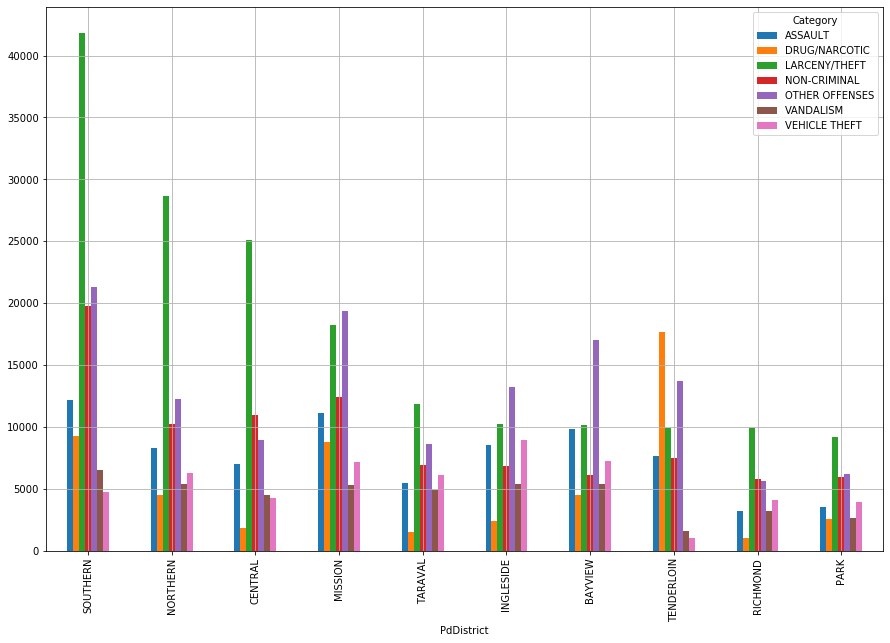

In [64]:
# crime_clf는 빈도가 높은 상위 범죄 7개의 DataFrame
pd_pivot = pd.pivot_table(crime_clf, index='PdDistrict', columns='Category', aggfunc='size')

var = pd_pivot.sort_values(by='LARCENY/THEFT', ascending=False)
var.plot(kind='bar', figsize=(15,10), grid=True)

```PdDistrict```별 종합범죄 빈도

In [77]:
pd_pivot['total'] = pd_pivot['ASSAULT'] + pd_pivot['DRUG/NARCOTIC'] + pd_pivot['LARCENY/THEFT'] + pd_pivot['NON-CRIMINAL'] \
 + pd_pivot['OTHER OFFENSES'] + pd_pivot['VANDALISM'] + pd_pivot['VEHICLE THEFT']

pd_pivot.sort_values(by='total', ascending=False)

Category,ASSAULT,DRUG/NARCOTIC,LARCENY/THEFT,NON-CRIMINAL,OTHER OFFENSES,VANDALISM,VEHICLE THEFT,total
PdDistrict,,,,,,,,
SOUTHERN,12183,9228,41841,19745,21307,6550,4724,115578
MISSION,11149,8757,18223,12372,19329,5294,7148,82272
NORTHERN,8318,4511,28628,10240,12230,5404,6291,75622
CENTRAL,6977,1805,25058,10940,8899,4469,4210,62358
BAYVIEW,9855,4498,10118,6099,17051,5355,7219,60195
TENDERLOIN,7678,17696,9901,7463,13721,1616,1004,59079
INGLESIDE,8532,2373,10235,6853,13201,5374,8960,55528
TARAVAL,5463,1531,11844,6919,8612,4869,6142,45380
PARK,3515,2573,9146,5925,6184,2613,3961,33917


### Q3-2) 이 시각화로 발견할 수 있는 사실은 어떤 게 있을까요? 그리고 앞서 우리의 예상과 어떤 차이가 있나요?
**1. 지도로 담당 ```PdDistrict```가 확연하게 구분되어 있을 것이다**

결과를 보면 ```PdDistrict```별로 구역이 뚜렷하게 구분되어져 있음. 하지만 담당 ```PdDistrict```에서 멀리 벗어난 소수의 범죄도 존재함을 볼 수 있음. 

**2. 특정 범죄 발생 빈도가 높은 ```PdDistrict```가 존재할 것이다**

```LARCENY/THEFT```범죄는 모든 관할 구역에서 높은 빈도를 보이는데 그 중 ```SOUTHERN```,```NORTHERN```,```CENTRAL```에서 상대적으로 많은 발생률을 보여주고 있음.

또한, ```DRUG/NARCOTIC```는 다른 범죄들에 비해 대체로 낮은 빈도를 보이는데 ```TENDERLOIN```은 유독 범죄 발생률이 높은 것을 확인할 수 있음.

**3. ```PdDistrict```별로 범죄 발생 빈도에 차이가 있을 것이다**

범죄가 가장 많이 발생하는 관할지역은 ```SOUTHERN```, ```MISSION```으로 다른 구역에 비해 범죄 발생
률이 높은편임을 확인 할 수 있음.


### Q4-3) 이 사실을 통해 어떻게 예측 모델을 개선할 수 있을까요? 최소 3가지 아이디어를 내보세요.¶

1. **```TENDERLOIN```의 관할 구역은 다른 구역에 비해 상대적으로 규모가 작은데 범죄 발생빈도는 범죄빈도는 높은편임(규모에 비해 인구가 많거나 적을 수 있다가 판단됨). 샌프란시스코의 거주지역 등 지역인구에 관한 데이터를 추가한다면 모델의 성능을 개선시킬 수 있을 것 같음**
1. **본 분석은 범죄 발생빈도가 높은 상위 7개의 범죄에 국한했지만 수십개의 범죄 유형을 그룹화 후 분석한다면 더 효과적인 인사이트를 발견할 수 있을 것임**
1. **추가적으로 관할 경찰서 별로 구역을 확대해서 범죄 빈도를 확인하면 모델의 성능에 도움이 될 것이라 판단됨**

## 나머지 데이터를 시각화를 통해 더 분석하기

지금까지 분석한 결과 외에도 다양한 방식으로 데이터를 분석하거나 시각화하여 데이터를 더 깊게 이해할려는 시도를 할 수 있습니다. 특히나 (힌트를 드리자면) ```Category``` 컬럼과 ```Address``` 컬럼을 잘 이해하는 것이 [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime) 경진대회에서 좋은 등수를 올릴 수 있는 핵심입니다.

그런 관점에서, 위에서 주워진 형식에 구애받지 않고 자유롭게 데이터를 분석하고 시각화해보세요. 분석하거나 시각화 할 때 다음의 링크를 참고하는 걸 추천드립니다.

* Mapping and Visualizing Violent Crime. ([링크](https://www.kaggle.com/mircat/violent-crime-mapping), [자료](https://www.kaggleusercontent.com/kf/144822/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..f18gU6H9MwiocQzte1wYUA.4n2GyIh6jZhkBR7iCLgiOBoRkuc4rvKZCyHpLWqaN-VYAckpd9DhvGmebkOLz4nJARW5m1ZY0aAp-1B9KKjiT66Y8CjpkWIhBavo0YQxx6Wfa_Uz-BmGzB9FsiTGT2ypT5hE_ns0SQQYPLh6ulXlfw.EGXnmo9w1gATD0AkT5X1WQ/output.html))
* Crime density by location. ([링크](https://www.kaggle.com/dbennett/test-map))
* White-Collar vs. Blue-Collar Crime in SF. ([링크](https://www.kaggle.com/ampaho/white-collar-vs-blue-collar-crime-in-sf))
* Histograms of Crime by Day/District/Year. ([링크](https://www.kaggle.com/petercooman/histograms-of-crime-category-by-day))
* Top Crimes Zones. [링크](https://www.kaggle.com/sanghan/top-crimes-zones)
* Vehicle Thefts or Jerry Rice Jubilation?. [링크](https://www.kaggle.com/eyecjay/vehicle-thefts-or-jerry-rice-jubilation/output), [자료](https://www.kaggleusercontent.com/kf/18658/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2In0..pbs95iVw0JCyvqI1Bx7Dow.y_q4Ttp_RJ6y1IqZjgiS19Tim_UhjIbpHfXNRA5MMQr6-INsupTZXJWuLwX-SXDPYacCHD6UM7eA-DfaddOdSgLwPkQWtpEW8yWnfSmnWyIpWld7XHqa5rPsQ7GhjzITDjMrzIwFAvui3NsyPZbrUgAyhcDHKnC1Ye5l8uefGbg.a9MmwpxVypr0vRB9wSjZYA/output.html)
* San Francisco Crime Classification. [링크](https://cseweb.ucsd.edu/classes/wi17/cse258-a/reports/a031.pdf)
* San Francisco crime classification: Descriptive, Predictive, and Prescriptive analysis.  [링크](https://medium.com/@m.vkumar89/san-francisco-spatial-data-research-for-crime-classification-1a6f1c1b7d09)
* My entry to the Kaggle SF crime classification competition using Apache Spark. [링크](http://benfradet.github.io/blog/2016/06/08/SF-crime-classification-with-Apache-Spark)

## 제출

과제를 다 끝내셨으면 http://bit.ly/ds-assignment 에서 안내에 따라 과제를 제출하여 주세요! 과제를 제출해주시면 검토 결과를 드립니다. 다음 Level에서 과제 내용을 다루기 때문에 솔루션은 따로 제공해드리지 않습니다.

수업이나 과제 관련 질문, 수료증 문의 등은 담당 튜터(조교)에게 문의 주세요. 영수증 발급 등의 문의는 support@dsschool.co.kr 로 메일 주시면 담당자분이 응대해주실 겁니다. 기타 궁금한 사항은 슬랙으로 문의 주세요!

기존의 라이브북 시스템을 이용하고 계신 수강생분들도 곧바로 슬랙으로 초대해드리겠습니다.